In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import json
from pprint import pprint

Analysis:\
My goal was to take a look at the setting and mode of the top outbreaks. The setting is *where* the illness was contracted (ex: "Daycare"), and the mode is *how* the illness was contracted("Person-to-person"). There are also 2 distinct groups per etiology(illness): a confirmed and suspected status. Confirmed is when the specific illness is tested in a medical lab via a biological sample collected from the patient. The test result would have to come back as "positive" for a confirmed status. Suspected would be if all symptoms match an specific illness, so one would have reasonable justification to report that illness.\
The dataframes and graphs show that confirmed and suspected cases are nearly equal. Nursing homes/Assisted Living is - by far - the most common setting to contract illnesses, followed by Daycare. The most common mode of infection is person-to-person contact, followed by food contamination.

In [4]:
outbreak = pd.read_csv("Cleaned_outbreak_data.csv")
outbreak.drop(["Hospitalizations","Info on Deaths"], axis=1, inplace=True)
outbreak.head()

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Info on Hospitalizations,Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,6.0,0.0
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,20.0,0.0
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,7.0,0.0
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,18.0,0.0
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,95.0,2.0


In [5]:
#number and list of unique settings
setting_count = len(outbreak["Setting"].unique())
print(f"There are {setting_count} settings listed in the dataset in which people became infected.")
setting_list = outbreak["Setting"].unique()
print(f"The settings are: {setting_list}")

There are 93 settings listed in the dataset in which people became infected.
The settings are: ['Other healthcare facility'
 'Long-term care/nursing home/assisted living facility'
 'Caterer (food prepared off-site from where served)'
 'Restaurant - Sit-down dining' 'Hospital' 'Child day care'
 'School/college/university' 'Other, specify'
 'Banquet Facility (food prepared and served on-site)'
 'Farm/dairy; Private home/residence' 'Restaurant'
 'Restaurant - other or unknown type' 'Grocery store'
 'Private home/residence' 'Hotel/motel' 'Restaurant - Buffet'
 'Veterinary clinic'
 'Restaurant - "Fast-food"(drive up service or pay at counter)'
 'Shelter/group home/transitional housing' 'Unknown'
 'Hotel/Motel/Lodge/Inn' 'Office/indoor workplace' 'Farm/dairy'
 'Prison/jail' 'Festival/fair' 'Other' 'Petting zoo'
 'Farm/dairy; Private home/residence; Veterinary clinic'
 'Long Term Care Facility' 'Hospital/Health Care'
 'Restaurant - other or unknown type; Banquet Facility (food prepared and se

In [6]:
#sort illnesses by confirmed or suspected status
etio_status = outbreak.groupby("Etiology Status")["Illnesses"].sum()
etio_status_df = pd.DataFrame(etio_status).sort_values(by="Illnesses",ascending=False).reset_index()
etio_status_df

,Etiology Status,Illnesses
0,Confirmed,26914
1,Suspected,24426
2,Confirmed; Confirmed,1401
3,Confirmed; Suspected,1370
4,Suspected; Suspected,781
5,Suspected; Confirmed,319
6,Confirmed; Suspected; Suspected,119
7,Confirmed; Confirmed; Suspected,79
8,Suspected; Suspected; Suspected,58
9,Confirmed; Confirmed; Confirmed,57


In [7]:
#drop rows with multiple etiologies
df2 = etio_status_df.drop(etio_status_df[etio_status_df.Illnesses < 1458].index)
df2

,Etiology Status,Illnesses
0,Confirmed,26914
1,Suspected,24426


Text(0.5, 1.0, '% of Confirmed Illnesses vs Suspected')

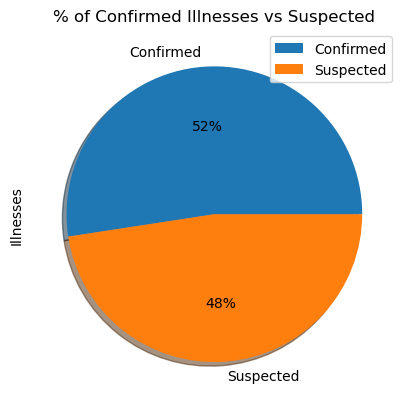

In [9]:
#percent of Illnesses confirmed vs suspected
df2.groupby(["Etiology Status"]).sum().plot(kind='pie', y='Illnesses',autopct='%1.0f%%',shadow=True)
plt.title("% of Confirmed Illnesses vs Suspected")

Here we see that 52% of reported illnesses were confirmed by a medical lab via a biological sample from the patient. 48% of cases were simply reported as matching the symptoms, but not confirmed by a medical test.

In [11]:
#get illnesses per setting
etio_setting = outbreak.groupby("Setting")["Illnesses"].sum()
etio_setting_df = pd.DataFrame(etio_setting).sort_values(by=["Illnesses"],ascending=False)
etio_setting_df.head(5)

,Illnesses
Setting,
Long-term care/nursing home/assisted living facility,25890
Child day care,5882
School/college/university,4588
Private home/residence; Agricultural feed store,2859
Unknown,2242


Using Chi-Square test to confirm the variance of of illnesses across the top 5 settings:

In [17]:
import scipy.stats as stats

In [18]:
observed = pd.Series([25890,5882,4588,2859,2242], index=["Assisted Living", "Child Care", "School","Home/Aggriculture Store","Unknown"])
observed

Assisted Living            25890
Child Care                  5882
School                      4588
Home/Aggriculture Store     2859
Unknown                     2242
dtype: int64

In [20]:
df = pd.DataFrame([observed]).T
df[1] = 8292.2
df.columns = ["observed", "expected"]
df

,observed,expected
Assisted Living,25890,8292.2
Child Care,5882,8292.2
School,4588,8292.2
Home/Aggriculture Store,2859,8292.2
Unknown,2242,8292.2


In [22]:
critical_val = stats.chi2.ppf(q = 0.95, df = 4)
critical_val

9.487729036781154

In [23]:
stats.chisquare(df["observed"], df["expected"])

Power_divergenceResult(statistic=47675.80482863413, pvalue=0.0)

As expected, the observed distribution of illnesses across 5 settings is vastly different than an averaged distribution. The p value is virtually, which is greater than the statistical value. 

In [12]:
#narrow down to top 5 settings
etio_setting_df.drop(etio_setting_df[etio_setting_df.Illnesses < 2241].index, inplace=True)

Text(0.5, 1.0, 'Top 5 Settings for Reported Illnesses')

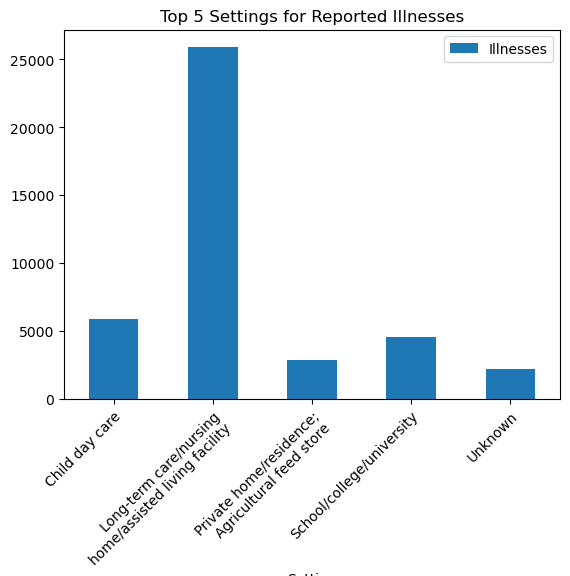

In [13]:
#bar chart of top 5 settings
etio_setting_df.groupby(["Setting"]).sum().plot(kind='bar',y="Illnesses")
plt.xticks(rotation=45,horizontalalignment="right",wrap=True,)
plt.title("Top 5 Settings for Reported Illnesses")

The top 5 settings (places illnesses were most likely contracted) by number of of reported cases. We can see that the #1 setting is Long-term care/nursing home/assisted living facility.

In [14]:
#get top etiologies by mode
etio_mode = outbreak.groupby("Primary Mode")["Illnesses"].sum()
etio_mode_df = pd.DataFrame(etio_mode).sort_values(by=["Illnesses"],ascending=False).reset_index
etio_mode_df

<bound method DataFrame.reset_index of                                                    Illnesses
Primary Mode                                                
Person-to-person                                       37147
Food                                                   11223
Animal Contact                                          3703
Indeterminate/Other/Unknown                             2829
Water                                                    733
Environmental contamination other than food/water         19>

The top Primary Modes (means by which illnesses are contracted) are listed by number of reported cases. Below, the pie graph shows the percent of each Mode, with Person-to-person contact at 67%. Water contamination is at only 1%

Text(0.5, 1.0, '% of Illnesses by Mode of Infection')

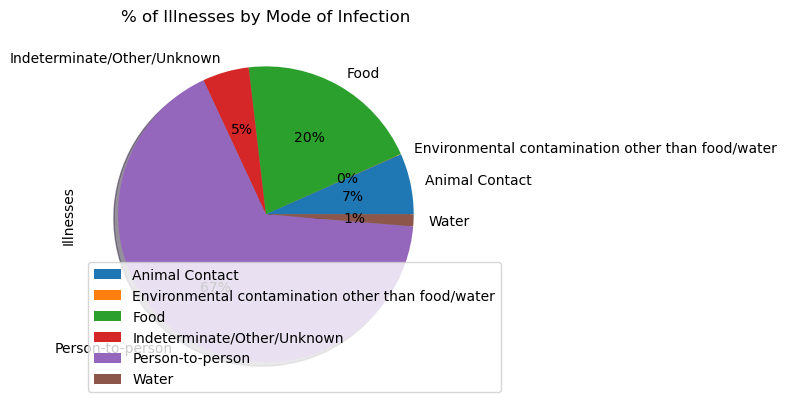

In [ ]:
#percent of Illnesses by primary mode
etio_mode_df.groupby(['Primary Mode']).sum().plot(kind='pie', y='Illnesses',autopct='%1.0f%%',shadow=True)
plt.title("% of Illnesses by Mode of Infection")

Text(0.5, 1.0, '# of Reported Illnesses per Mode of Infection')

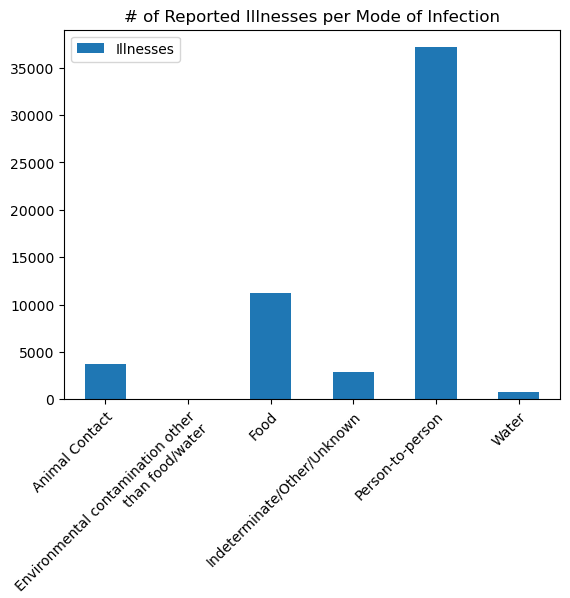

In [ ]:
etio_mode_df.groupby(["Primary Mode"]).sum().plot(kind='bar',y="Illnesses")
plt.xticks(rotation=45, horizontalalignment="right",wrap=True,)
plt.title("# of Reported Illnesses per Mode of Infection")